# TESTING BBOX SETTINGS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spatial
from read_data import get_pointclouds
from bbox import minBoundingRect
import math


point_clouds = get_pointclouds()

In [2]:
print(point_clouds['building'])


[{'point_cloud': array([[ 20.06999969, 499.95999146,  17.45000076],
       [ 20.37000084, 499.16000366,  17.29000092],
       [ 18.86000061, 499.55999756,  18.12999916],
       ...,
       [ 20.11000061, 499.95999146,  17.47999954],
       [ 12.56999969, 499.98999023,  18.36000061],
       [ 17.56999969, 499.97000122,  18.88999939]])}, {'point_cloud': array([[373.30999756, 404.22000122,   7.13000011],
       [372.76000977, 404.32000732,   7.15999985],
       [372.1499939 , 404.51000977,   6.98999977],
       ...,
       [378.98001099, 408.73999023,   6.38000011],
       [379.17999268, 405.41000366,   7.8499999 ],
       [379.20999146, 405.19000244,   5.5       ]])}, {'point_cloud': array([[ 65.91000366, 326.85998535,  12.71000004],
       [ 65.23000336, 327.01000977,  12.68000031],
       [ 66.54000092, 326.69000244,  12.82999992],
       ...,
       [ 66.66000366, 322.98999023,  12.60000038],
       [ 66.51000214, 326.1499939 ,  12.63000011],
       [ 66.34999847, 326.82998657,  12.75

In [3]:
for label, clouds in point_clouds.items():
    for cloud in clouds:
        pc = cloud['point_cloud']
        height = np.max(pc[:, 2])
        height_object = np.max(pc[:, 2]) - np.min(pc[:, 2])
        distance_z = np.mean(pc[:, 2]) - (np.max(pc[:, 2]) + np.min(pc[:, 2]))
        area_bbox = (np.max(pc[:, 1]) - np.min(pc[:, 1])) * (np.max(pc[:, 0]) - np.min(pc[:, 0]))
        hull = spatial.ConvexHull(pc[:, 0:2])
        num_pts = pc.shape[0]
        mbbox = minBoundingRect(hull.points)
        sides = mbbox[2], mbbox[3]
        center_xy = mbbox[4]
        avg_xy = np.mean(pc[:, 0]), np.mean(pc[:, 1])
        distance_xy = abs(math.dist(center_xy, avg_xy))
        diff_con_mbbox = (hull.volume / area_bbox)
        
        
        
        avg_density_m2 = num_pts / mbbox[1]
        avg_density_m3 = num_pts / (mbbox[1] * height_object)
        aspect_ratio = max(sides) / min(sides)

        cloud['height'] = height
        cloud['height_object'] = height_object
        cloud['area'] = area_bbox
        cloud['convex_area'] = hull.volume
        cloud['density_m2'] = avg_density_m2
        cloud['density_m3'] = avg_density_m3
        cloud['aspect_ratio'] = aspect_ratio
        cloud['dis_xy'] = distance_xy
        cloud['dis_z'] = distance_z
        cloud['diff_area'] = diff_con_mbbox        
        
        cloud['area_oriented'] = mbbox[1]
        
        cloud['mbbox'] = mbbox


Testing 1796 possible rotations for bounding box... 

Testing 2046 possible rotations for bounding box... 
Testing 8760 possible rotations for bounding box... 
Testing 10078 possible rotations for bounding box... 
Testing 11880 possible rotations for bounding box... 
Testing 3348 possible rotations for bounding box... 
Testing 3158 possible rotations for bounding box... 
Testing 12429 possible rotations for bounding box... 
Testing 7451 possible rotations for bounding box... 
Testing 5402 possible rotations for bounding box... 
Testing 6897 possible rotations for bounding box... 
Testing 9563 possible rotations for bounding box... 
Testing 1887 possible rotations for bounding box... 

Testing 5914 possible rotations for bounding box... 
Testing 6948 possible rotations for bounding box... 
Testing 24788 possible rotations for bounding box... 
Testing 5216 possible rotations for bounding box... 
Testing 6859 possible rotations for bounding box... 
Testing 1114 possible rotations for boun

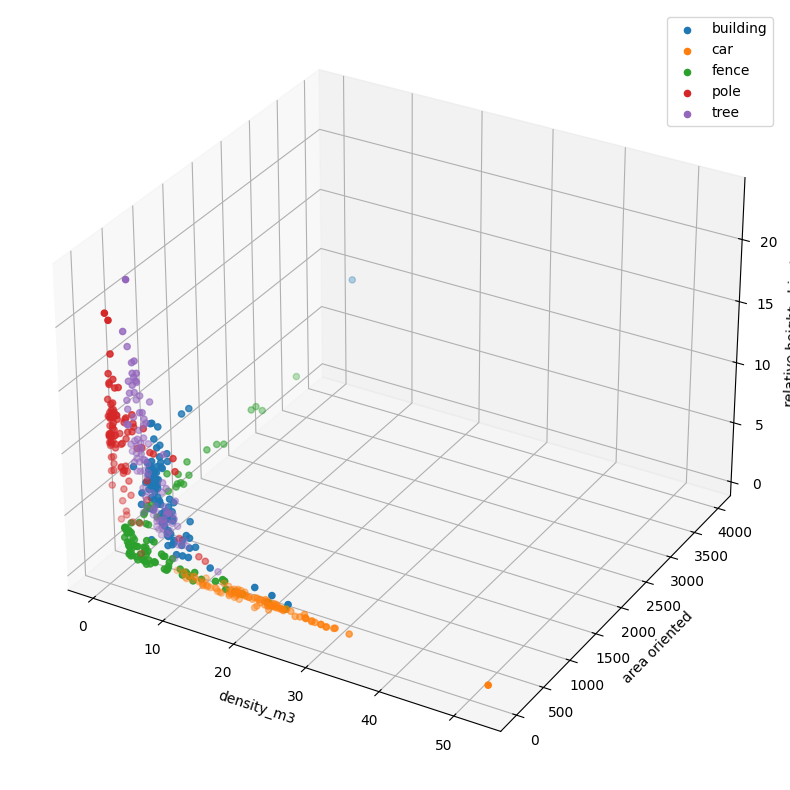

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for label, clouds in point_clouds.items():
    heights = []
    areas = []
    points = []
    for cloud in clouds:
        heights.append(cloud['height_object'])
        areas.append(cloud['dis_z'])
        points.append(cloud['density_m3'])

    ax.scatter(points, areas, heights, label=label)

# Set maximum values for each axis
# ax.set_xlim([0, 100])  
# ax.set_ylim([0, 100]) 
# ax.set_zlim([0, 100])  

ax.set_xlabel('density_m3')
ax.set_ylabel('area oriented')
ax.set_zlabel('relative height object')
plt.legend()
plt.show()